<a href="https://colab.research.google.com/github/Logeshj04/PRODIGY_DS_04/blob/main/PRODIGY_DS_04_LOGESH_J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
data = pd.read_csv('/content/twitter_training.csv')
validation_data = pd.read_csv('/content/twitter_validation.csv')

In [5]:
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
53821,2048,CallOfDuty,Negative,@ CfDuty fix their game new omg challenge with...
53822,2048,CallOfDuty,Negative,@CallofDuty fix your game new omg challenge re...
53823,2048,CallOfDuty,Negative,Dear @CallofDuty fix your stupid game new omg ...
53824,2048,CallOfDuty,Negative,@CallofDuty fix your game new omg challenge cu...


In [6]:
validation_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
data.columns = ['id', 'game', 'sentiment', 'text']
validation_data.columns = ['id', 'game', 'sentiment', 'text']

In [8]:
data

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
53821,2048,CallOfDuty,Negative,@ CfDuty fix their game new omg challenge with...
53822,2048,CallOfDuty,Negative,@CallofDuty fix your game new omg challenge re...
53823,2048,CallOfDuty,Negative,Dear @CallofDuty fix your stupid game new omg ...
53824,2048,CallOfDuty,Negative,@CallofDuty fix your game new omg challenge cu...


In [9]:
validation_data

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
data.shape

(53826, 4)

In [11]:
data.columns

Index(['id', 'game', 'sentiment', 'text'], dtype='object')

In [12]:
data.describe(include='all')

,id,game,sentiment,text
count,53826.000000,53826,53826,53334
unique,NaN,24,4,49997
top,NaN,Microsoft,Positive,It is not the first time that the EU Commissio...
freq,NaN,2400,16079,120
mean,6289.110950,NaN,NaN,NaN
std,3939.111938,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,2664.000000,NaN,NaN,NaN
50%,6190.000000,NaN,NaN,NaN
75%,9685.000000,NaN,NaN,NaN


In [13]:
id_types = data['id'].value_counts()
id_types

id
1026    6
8162    6
8156    6
8157    6
8158    6
       ..
9868    6
9867    6
2047    6
2401    5
2049    1
Name: count, Length: 8972, dtype: int64

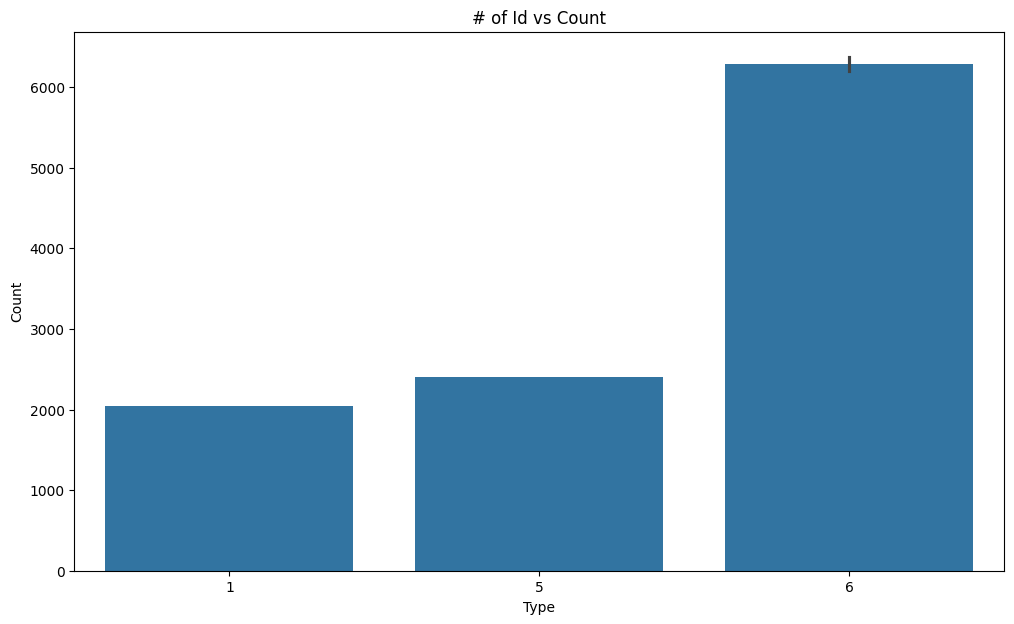

In [14]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

In [15]:
game_types = data['game'].value_counts()
game_types

game
Microsoft                            2400
LeagueOfLegends                      2394
Verizon                              2382
ApexLegends                          2376
CallOfDutyBlackopsColdWar            2376
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
CS-GO                                2304
Google                               2298
Hearthstone                          2298
Borderlands                          2285
PlayerUnknownsBattlegrounds(PUBG)    2274
Fortnite                             2274
RedDeadRedemption(RDR)               2262
AssassinsCreed                       2244
CallOfDuty                   

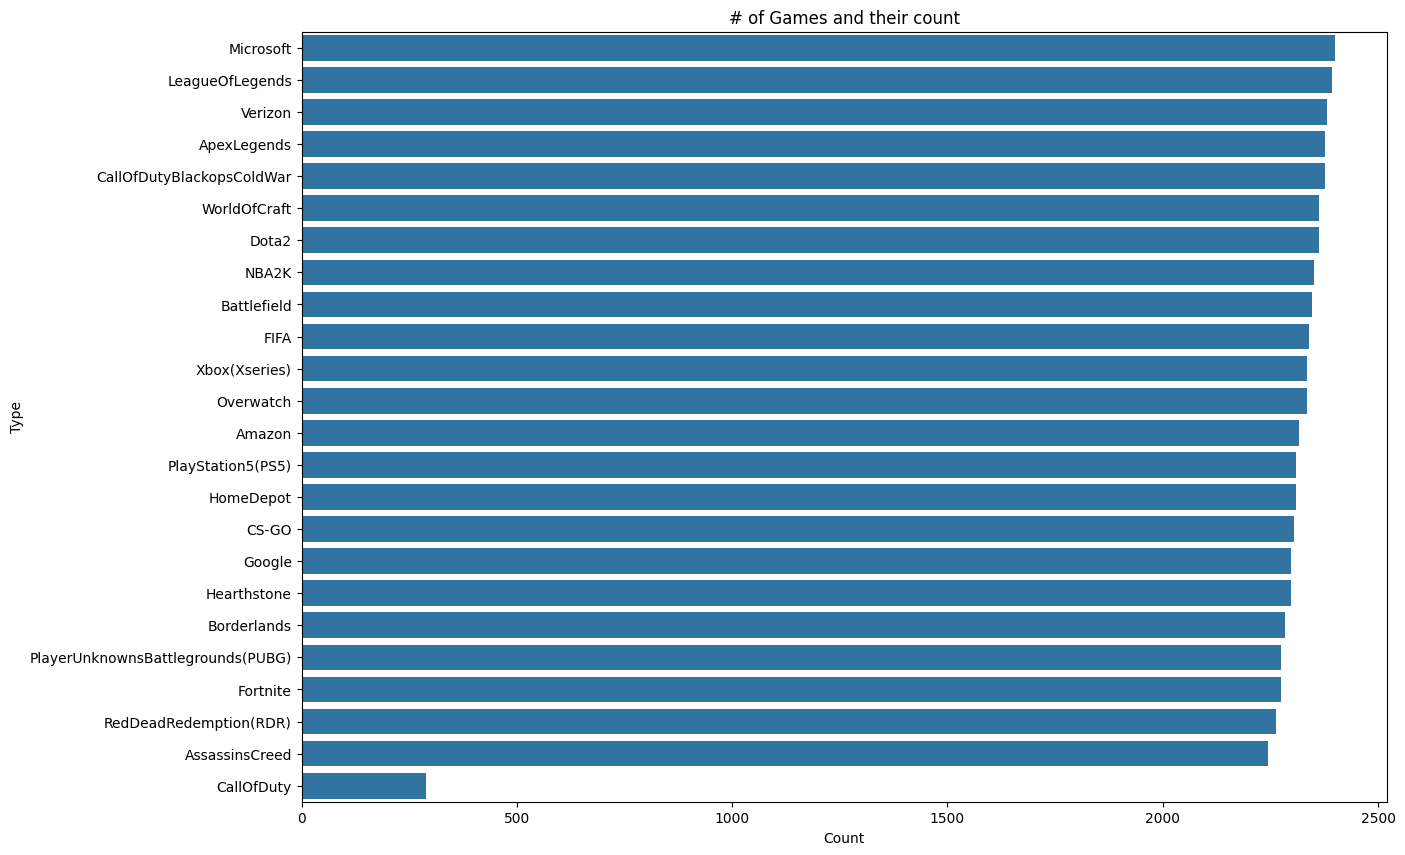

In [16]:
plt.figure(figsize=(14,10))

sns.barplot(x=game_types.values,y=game_types.index)
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

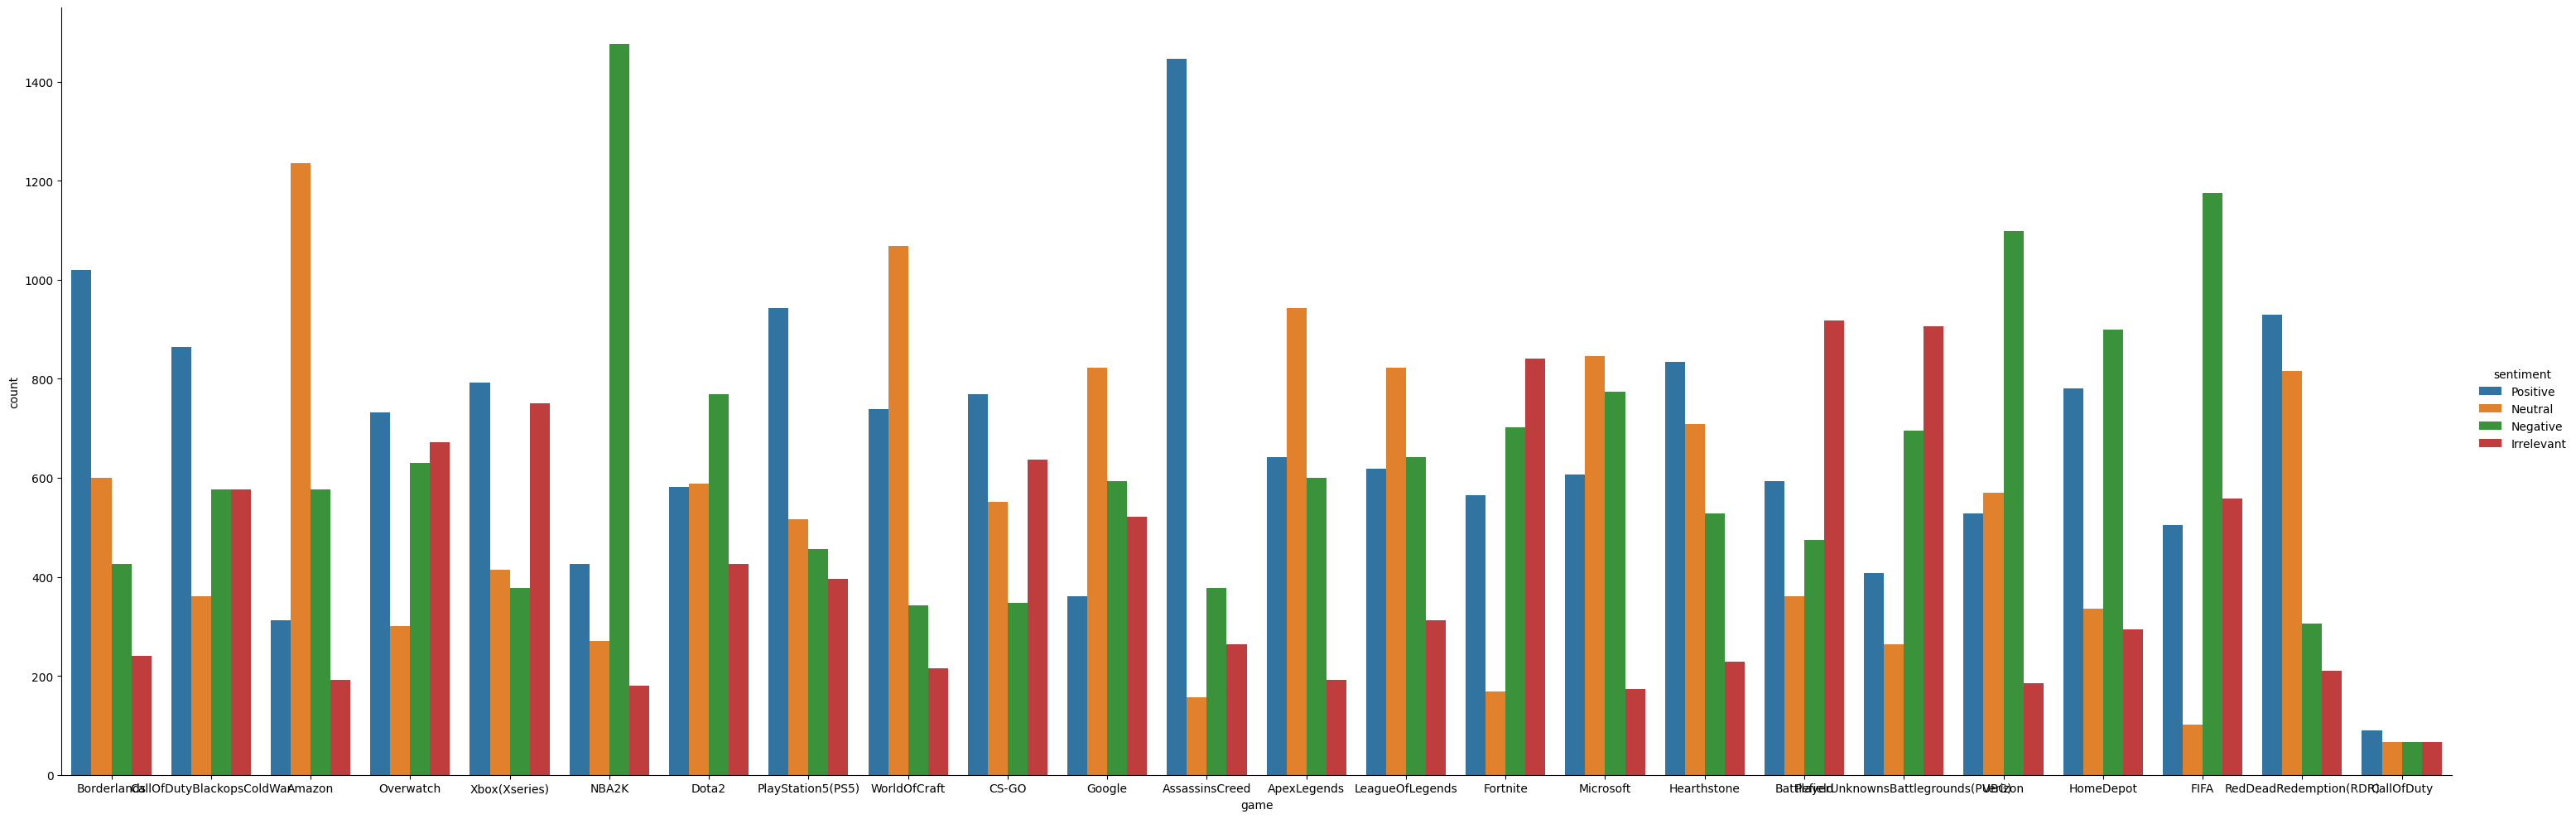

In [17]:
sns.catplot(x="game",hue="sentiment", kind="count",height=10,aspect=3, data=data)

<Axes: >

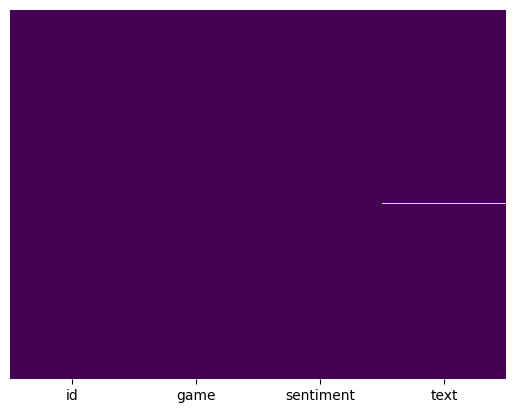

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  53826


,Total Missing,In Percent
text,492,0.91
id,0,0.00
game,0,0.00
sentiment,0,0.00


In [20]:
data.dropna(subset=['text'],inplace=True)

total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  53334


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [21]:
train0=data[data['sentiment']=="Negative"]
train1=data[data['sentiment']=="Positive"]
train2=data[data['sentiment']=="Irrelevant"]
train3=data[data['sentiment']=="Neutral"]

In [ ]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [22]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [23]:
train0.shape, train1.shape, train2.shape, train3.shape

((1232, 4), (1329, 4), (821, 4), (1061, 4))

In [24]:
data=pd.concat([train0,train1,train2,train3],axis=0)
data

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
4882,39,Amazon,Neutral,This Audio Book to Keep Me Anything I Like “HU...
4883,40,Amazon,Neutral,@HC0RD3R0 Thanks for entering Grand Summoners ...
4884,40,Amazon,Neutral,@ HC0RD3R0 Thank you for participating in Summ...
4885,40,Amazon,Neutral,@ HC0RD3R0 Thanks for entering Grand Summoners...


In [25]:
id_types = data['id'].value_counts()
id_types

id
2405    6
1670    6
1676    6
1679    6
1680    6
       ..
1719    3
1602    3
37      3
1959    3
195     1
Name: count, Length: 749, dtype: int64

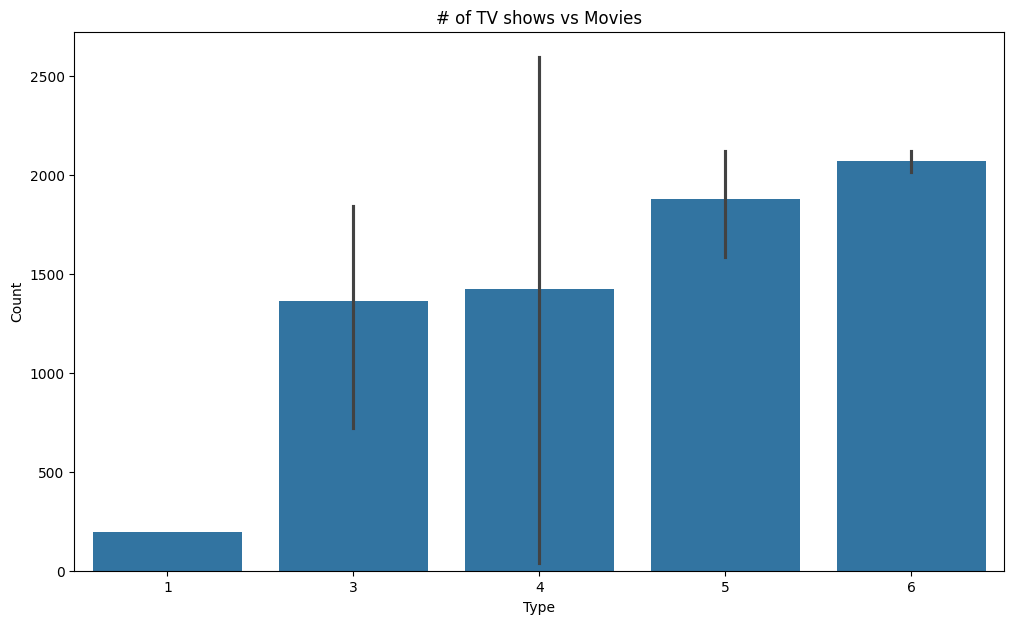

In [26]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [27]:
game_types = data['game'].value_counts()
game_types

game
Borderlands                  2279
CallOfDutyBlackopsColdWar    1800
Amazon                        364
Name: count, dtype: int64

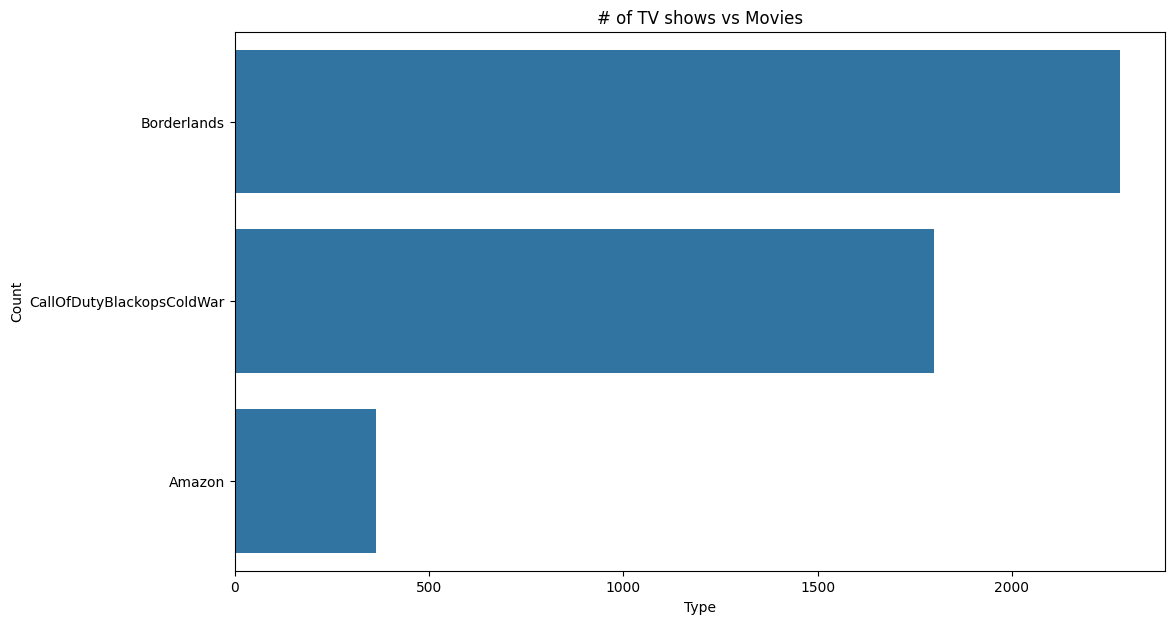

In [28]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [29]:
sentiment_types = data['sentiment'].value_counts()
sentiment_types

sentiment
Positive      1329
Negative      1232
Neutral       1061
Irrelevant     821
Name: count, dtype: int64

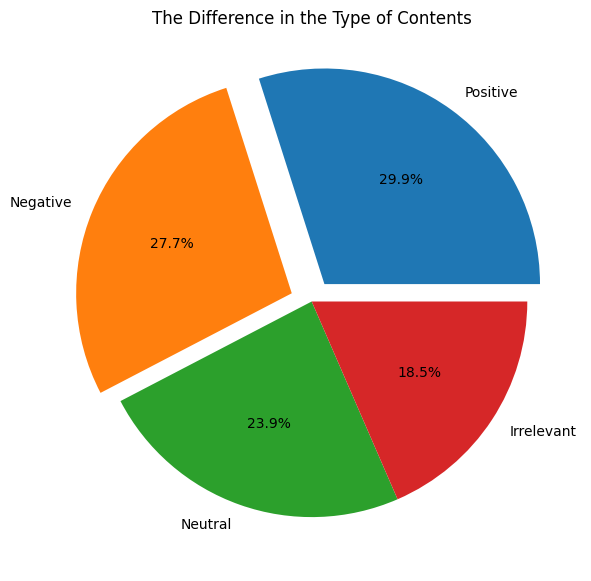

In [30]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

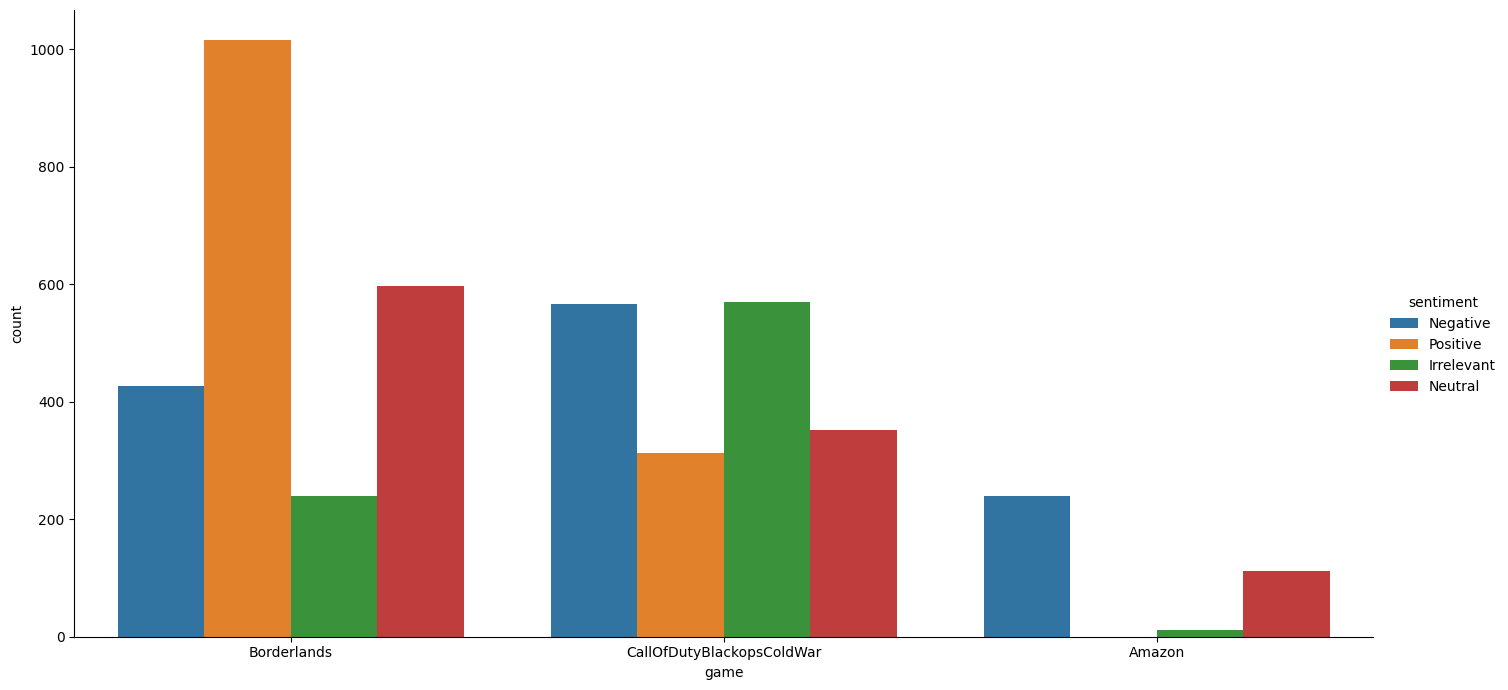

In [31]:
sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=2,data=data)

In [32]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [35]:
data['sentiment']=label_encoder.fit_transform(data['sentiment'])
data['game']=label_encoder.fit_transform(data['game'])
validation_data['sentiment']=label_encoder.fit_transform(validation_data['sentiment'])
validation_data['game']=label_encoder.fit_transform(validation_data['game'])

In [36]:
data = data.drop(['id'],axis=1)

data

,game,sentiment,text
23,1,1,the biggest dissappoinment in my life came out...
24,1,1,The biggest disappointment of my life came a y...
25,1,1,The biggest disappointment of my life came a y...
26,1,1,the biggest dissappoinment in my life coming o...
27,1,1,For the biggest male dissappoinment in my life...
...,...,...,...
4882,0,2,This Audio Book to Keep Me Anything I Like “HU...
4883,0,2,@HC0RD3R0 Thanks for entering Grand Summoners ...
4884,0,2,@ HC0RD3R0 Thank you for participating in Summ...
4885,0,2,@ HC0RD3R0 Thanks for entering Grand Summoners...


In [37]:
data.nunique()

game            3
sentiment       4
text         4219
dtype: int64

In [39]:
validation_data.nunique()

id           999
game          32
sentiment      4
text         998
dtype: int64

#END